Student ID : 2017120175

Name : Jae-Hong Park

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
real_train_label    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1
    
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

<Figure size 640x480 with 150 Axes>

<Figure size 640x480 with 10 Axes>

In [2]:
from scipy import signal
def convol(mat):
    mat = mat.reshape((size_row, size_col))
    filter = []
    kernel1 = np.array([[1,1,1],[0,0,0],[0,0,0]])
    kernel2 = np.array([[0,0,0],[1,1,1],[0,0,0]])
    kernel3 = np.array([[0,0,0],[0,0,0],[1,1,1]])
    kernel4 = np.array([[1,0,0],[1,0,0],[1,0,0]])
    kernel5 = np.array([[0,1,0],[0,1,0],[0,1,0]])
    kernel6 = np.array([[0,0,1],[0,0,1],[0,0,1]])
    feat1 = signal.convolve2d(mat, kernel1, boundary='symm', mode='same')
    feat2 = signal.convolve2d(mat, kernel2, boundary='symm', mode='same')
    feat3 = signal.convolve2d(mat, kernel3, boundary='symm', mode='same')                   
    feat4 = signal.convolve2d(mat, kernel4, boundary='symm', mode='same')                   
    feat5 = signal.convolve2d(mat, kernel5, boundary='symm', mode='same')                   
    feat6 = signal.convolve2d(mat, kernel6, boundary='symm', mode='same')                   
    filter = (np.mean(feat1), np.mean(feat2), np.mean(feat3), np.mean(feat4), np.mean(feat5), np.mean(feat6))
    return filter

# Processing Singular

In [3]:
myProcessingmatrix = []
for i in range(len(list_image_train.T)):
    mat = convol(list_image_train.T[i])
    myProcessingmatrix.append(mat)
myProcessingmatrix_test = []
for i in range(len(list_image_test.T)):
    mat2 = convol(list_image_test.T[i])
    myProcessingmatrix_test.append(mat2)

# Y change the 값 for Binary Classifying

In [4]:
for i in range(len(list_label_train)):
    if(int(list_label_train[i]) == 0):
        list_label_train[i] = 1
    else:
        list_label_train[i] = -1
for i in range(len(list_label_test)):
    if(int(list_label_test[i]) == 0):
        list_label_test[i] = 1
    else:
        list_label_test[i] = -1

# make feature

In [5]:
mu, sigma = 0, 1; featureFunc = []
r = np.random.normal(mu, sigma, 6)
for i in range(0, len(myProcessingmatrix)): # make 9 feature
    fe = r*myProcessingmatrix[i]
    featureFunc.append(fe)
featureFunc = np.mat(featureFunc)   

# Least Square Approximation: $ W = (X^T X)^{-1} X^T y $ 

In [6]:
def computeApproximation(vecX,vecY):
    vecX = np.mat(vecX)
    vecY = np.mat(vecY).T
    xTx = vecX.T * vecX
    if(np.linalg.det(xTx) == 0.0): # if Singular function, return 
        print("This matrix is singular")
        return
    weight = xTx.I * (vecX.T * vecY) # weight
    return weight

In [7]:
weight = computeApproximation(featureFunc, list_label_train)

In [8]:
trainY = myProcessingmatrix_test*weight

# Binary Classification

In [9]:
def binaryClassifier(data, X, Y):
    FN = []; FP = []; TN = []; TP = []
    for i in range(0, len(data)):
        if(float(data[i]) > 0):
            if(int(Y[i]) == 1):
                TP.append(X[i])
            else:
                FP.append(X[i])
        else:
            if(int(Y[i]) == 1):
                FN.append(X[i])
            else:
                TN.append(X[i])
    return FN, FP, TN, TP

In [10]:
FN, FP, TN, TP = binaryClassifier(trainY, list_image_test.T, list_label_test)

# Compute Accuracy

In [11]:
accuracy = ((len(TN)+len(TP))/10000)*100
print(accuracy)
if((len(TP)+len(FP)) != 0):
    precision = 2*(len(TP))/(len(TP)+len(FP))
else:
    precision = 0
recall = len(TP)/(len(FN)+len(TP))
if((precision+recall) != 0):
    f1 = 2*(precision*recall)/(precision+recall)
else: f1 = 0
print(f1)

90.2
0


In [12]:
print(len(TN))

9020


# Compute Average FN, FP, TN, TP

In [13]:
def computeMin(vec):
    vec = np.mat(vec)
    mean_ = np.mean(vec, axis=0)
    return mean_

# Visualization 

ValueError: cannot reshape array of size 0 into shape (28,28)

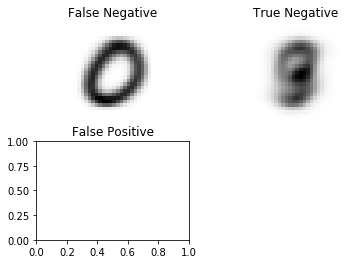

In [14]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)


P1 = plt.subplot(2, 2, 1)
P1.set_title('False Negative')
im_average = computeMin(FN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P2 = plt.subplot(2, 2, 2)
P2.set_title('True Negative')
im_average = computeMin(TN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P3 = plt.subplot(2, 2, 3)
P3.set_title('False Positive')
im_average = computeMin(FP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P4 = plt.subplot(2, 2, 4)
P4.set_title('True Positive')
im_average = computeMin(TP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')